In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('./data/Medicalpremium.csv') #read csv file

# EDA
## 檢視表格資料及空值檢查

In [4]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


## 各欄位介紹 (1:有, 0:無)
---
Age ：年齡  
Diabetes : 是否患有糖尿病  
BloodPressureProblems : 是否血壓有異常問題  
AnyTransplants : 是否經歷過主要器官移植手術  
AnyChronicDiseases : 是否患有哮喘等慢性疾病  
Height : 身高,	Weight : 體重  
KnownAllergies : 是否有任何已知的過敏症  
HistoryOfCancerInFamily : 任何血緣親屬是否患有任何形式的癌症   
NumberOfMajorSurgeries : 該人接受過的大手術次數  
PremiumPrice : 年保費價格  
  


---


In [5]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [6]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


新增BMI欄位

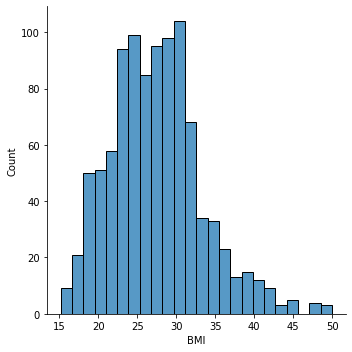

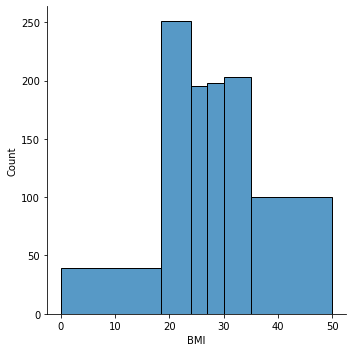

In [7]:
#compute BMI
df["BMI"] = df.Weight/(df.Height/100)**2
sns.displot(df.BMI)
sns.displot(df.BMI,bins=[0,18.5,24,27,30,35,df.BMI.max()])
df["BMI"] = pd.to_numeric(pd.cut(df['BMI'], bins=[0,18.5,24,27,30,35,df.BMI.max()], labels=[0,1,2,3,4,5]))

# 檢視PremiumPrice分布

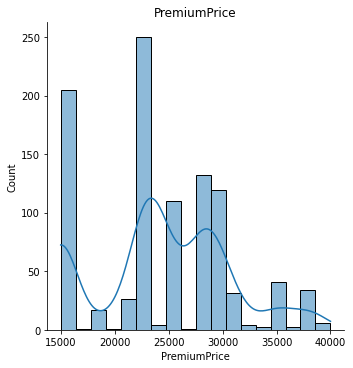

In [8]:
sns.displot(df.PremiumPrice, kde=True)
plt.title("PremiumPrice")
plt.show()

## 畫出個欄位的Correlation heap map

Text(0.5, 1.0, 'Correlation Heatmap')

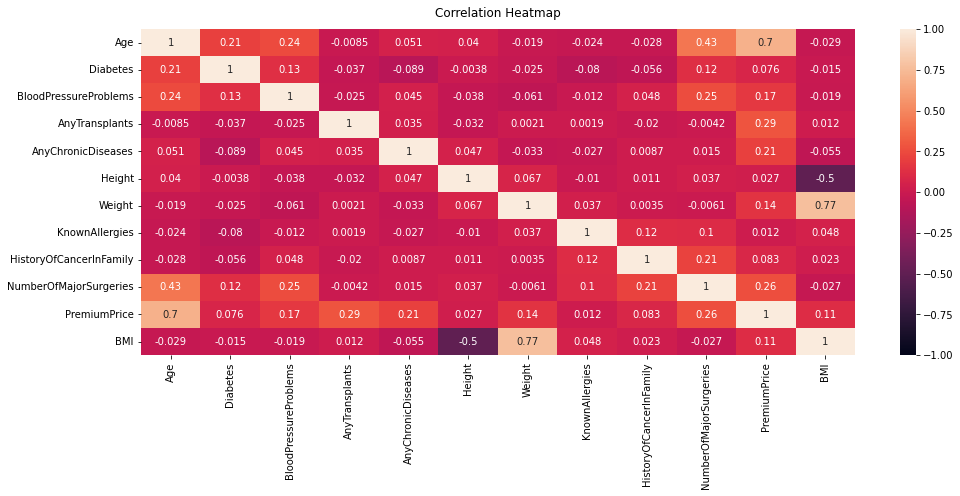

In [9]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

根據Correlation heap map 的圖表，選出與PremiumPrice相關性大於0.2之欄位做EDA  
(Age, AnyTransplants, AnyChronicDiseases, NumberOfMajorSurgeries)

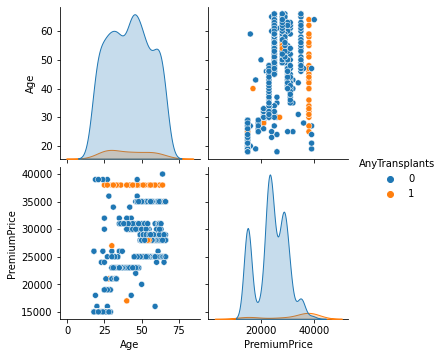

In [10]:
sns.pairplot(df, vars = ["Age", "PremiumPrice"], hue = "AnyTransplants")
plt.show()

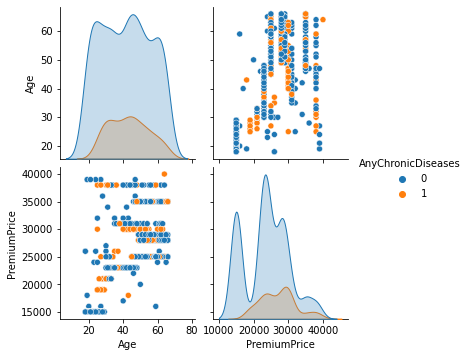

In [11]:
sns.pairplot(df, vars = ["Age", "PremiumPrice"], hue = "AnyChronicDiseases")
plt.show()

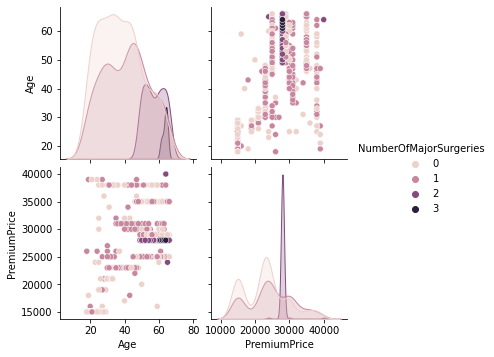

In [12]:
sns.pairplot(df, vars = ["Age", "PremiumPrice"], hue = "NumberOfMajorSurgeries")
plt.show()

畫出三個連續性欄位的關聯分布及對應的PremiumPrice label

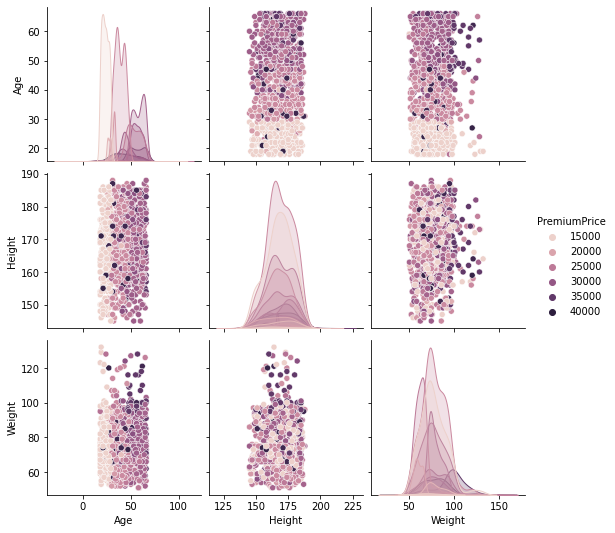

In [13]:
sns.pairplot(df, vars = ["Age", "Height", "Weight"], hue = "PremiumPrice")
plt.show()

由上述之EDA可看出，

*   年齡是影響PremiumPrice的主要因子, 但身高及體重似乎較無關聯
*   是否經歷過主要器官移植手術也會使得PremiumPrice需要付出相當大的金額
*   該人接受過的大手術次數與PremiumPrice有明顯的分布差異
---



由於年齡與PremiumPrice高度相關，在這邊再創一個欄位代表幼年、青年、壯年、老年，以增加模型對於年齡的權重。

In [14]:
df["Age_new"]=pd.to_numeric(pd.cut(df["Age"],bins=[0,20,40,65,100], labels = [0,1,2,3]))

# Model select & training
## 1.選擇模型

In [15]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
PremiumPrice = labelencoder.fit_transform(df.PremiumPrice)
df_x = df.drop(columns = ["PremiumPrice"])
xtr,xte,ytr,yte=train_test_split(df_x,PremiumPrice,random_state=33,test_size=0.2, shuffle = True)


In [17]:
models=[('KNN',KNeighborsClassifier()),('DT',DecisionTreeClassifier()),('RF',RandomForestClassifier()),('AdaBoost',AdaBoostClassifier())
        ,('GP',GaussianProcessClassifier()),('NB',GaussianNB()),('XGB',XGBClassifier())]
scores=[]

for name,model in models:
    model.fit(xtr,ytr)
    preds=model.predict(xte)
    score=explained_variance_score(preds,yte)
    scores.append([name,model,score])

[16:02:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
scores_df=pd.DataFrame(scores,columns=['Name','Model','Score'])
scores_df.sort_values('Score',ascending=False)

,Name,Model,Score
2,RF,"(DecisionTreeClassifier(max_features='auto', r...",0.867126
6,XGB,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.841913
1,DT,DecisionTreeClassifier(),0.601186
0,KNN,KNeighborsClassifier(),0.503029
4,GP,GaussianProcessClassifier(),0.479142
5,NB,GaussianNB(),-2.088827
3,AdaBoost,"(DecisionTreeClassifier(max_depth=1, random_st...",-33.254638


由上表選定最高的explained_variance_score為RandomForest model,因此選定為模型進行grid search最佳化參數

In [19]:
from sklearn.model_selection import GridSearchCV
classfier=RandomForestClassifier (n_jobs=-1,verbose=2)
param_grid={'n_estimators':[500,300,100],
            'max_depth':[7,8,9,10],
            'min_samples_split':[3,4,5],
            'max_features':['auto']}
gs=GridSearchCV(classfier,param_grid=param_grid,cv=3,n_jobs=-1,verbose=-1)
gs.fit(xtr,ytr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.0s


building tree 1 of 300building tree 2 of 300

building tree 3 of 300building tree 4 of 300

building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300building tree 10 of 300
building tree 11 of 300

building tree 12 of 300building tree 13 of 300

building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300building tree 18 of 300

building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300building tree 23 of 300

building tree 24 of 300building tree 25 of 300building tree 26 of 300


building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300building tree 36 of 300

building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300building tree 41 of 300

building tree 42 of 300bu

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9, 10], 'max_features': ['auto'],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 300, 100]},
             verbose=-1)

In [20]:
pre = gs.predict(xte)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.0s finished


In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pre, yte)
print(f"best accuracy(RandomForest model) = {accuracy:2.2f}")

best accuracy(RandomForest model) = 0.92


最後RandomForest之Accuracy高達0.92

在此，我們想將label分割範圍取較大，把PremiumPrice分成五群再做分類，
其目的在於，由於此PremiumPrice幣值與台幣或美金不同，我們想藉較寬的區間界定來廣泛應用在各個情況上。
也希望透過切分較寬的區間提高分辨率。

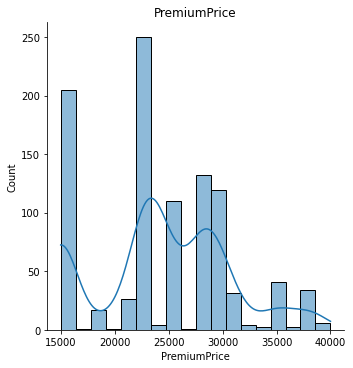

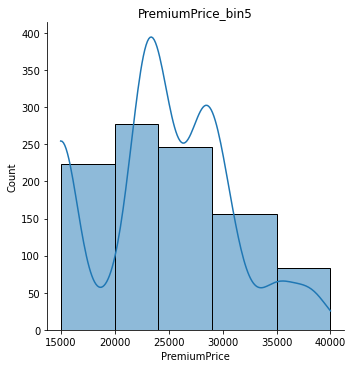

In [22]:
sns.displot(df.PremiumPrice, kde=True)
plt.title("PremiumPrice")
sns.displot(df.PremiumPrice, bins=[df.PremiumPrice.min(), 20000, 24000, 29000, 35000, df.PremiumPrice.max()], kde=True)
plt.title("PremiumPrice_bin5")
plt.show()
df['PremiumLabel'] = pd.to_numeric(pd.cut(df['PremiumPrice'], bins=[df.PremiumPrice.min()-1, 19000, 24000, 29000, 35000, df.PremiumPrice.max()], labels=[0,1,2,3,4]))

In [23]:
xtr,xte,ytr,yte=train_test_split(df_x,df.PremiumLabel,random_state=33,test_size=0.2, shuffle = True)
from sklearn.model_selection import GridSearchCV
classfier=RandomForestClassifier (n_jobs=-1,verbose=2)
param_grid={'n_estimators':[500,300,100],
            'max_depth':[7,8,9,10],
            'min_samples_split':[3,4,5],
            'max_features':['auto']}
gs=GridSearchCV(classfier,param_grid=param_grid,cv=3,n_jobs=-1,verbose=-1)
gs.fit(xtr,ytr)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.0s


building tree 1 of 300building tree 2 of 300

building tree 3 of 300
building tree 4 of 300building tree 5 of 300

building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300building tree 19 of 300

building tree 20 of 300
building tree 21 of 300building tree 22 of 300

building tree 23 of 300
building tree 24 of 300building tree 25 of 300building tree 26 of 300


building tree 27 of 300building tree 28 of 300
building tree 29 of 300

building tree 30 of 300building tree 31 of 300

building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300

building tree 40 of 300
building tree 41 of 300building tree 42 of 300bui

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': [7, 8, 9, 10], 'max_features': ['auto'],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [500, 300, 100]},
             verbose=-1)

In [24]:
pre = gs.predict(xte)
accuracy = accuracy_score(pre, yte)
print(f"best accuracy(RandomForest model) = {accuracy:2.2f}")

best accuracy(RandomForest model) = 0.93


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.0s finished


最後分數來到了0.93分效果不明顯

In [26]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
df_x = df.drop(columns = ["PremiumLabel", "PremiumPrice"])
PremiumPrice = labelencoder.fit_transform(df.PremiumLabel)
PremiumPrice=onehotencoder.fit_transform(np.array(PremiumPrice).reshape(-1, 1)).toarray()
xtr_dnn,xte_dnn,ytr_dnn,yte_dnn=train_test_split(df_x,PremiumPrice,random_state=33,test_size=0.2, shuffle = True)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = "./best.hdf5"
model = Sequential()
model.add(Dense(units=16, input_dim=xtr_dnn.shape[1], kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=ytr_dnn.shape[1], kernel_initializer='normal',activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam" , metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
earlystopper = EarlyStopping(monitor='val_accuracy', patience=2000, verbose=1)
callbacks_list = [checkpoint, earlystopper]

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                208       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [30]:
train_history = model.fit(x=xtr_dnn, y=ytr_dnn, validation_split=0.3, epochs=10000, batch_size=800, verbose=2, shuffle=True, callbacks=callbacks_list)

Epoch 1/10000

Epoch 00001: val_accuracy improved from -inf to 0.32068, saving model to .\best.hdf5
1/1 - 2s - loss: 1.6171 - accuracy: 0.2759 - val_loss: 1.6035 - val_accuracy: 0.3207 - 2s/epoch - 2s/step
Epoch 2/10000

Epoch 00002: val_accuracy improved from 0.32068 to 0.32489, saving model to .\best.hdf5
1/1 - 0s - loss: 1.6110 - accuracy: 0.2759 - val_loss: 1.5978 - val_accuracy: 0.3249 - 34ms/epoch - 34ms/step
Epoch 3/10000

Epoch 00003: val_accuracy did not improve from 0.32489
1/1 - 0s - loss: 1.6051 - accuracy: 0.2759 - val_loss: 1.5920 - val_accuracy: 0.3249 - 18ms/epoch - 18ms/step
Epoch 4/10000

Epoch 00004: val_accuracy did not improve from 0.32489
1/1 - 0s - loss: 1.5992 - accuracy: 0.2777 - val_loss: 1.5862 - val_accuracy: 0.3249 - 19ms/epoch - 19ms/step
Epoch 5/10000

Epoch 00005: val_accuracy did not improve from 0.32489
1/1 - 0s - loss: 1.5935 - accuracy: 0.2795 - val_loss: 1.5802 - val_accuracy: 0.3207 - 19ms/epoch - 19ms/step
Epoch 6/10000

Epoch 00006: val_accuracy 

Epoch 46/10000

Epoch 00046: val_accuracy did not improve from 0.43882
1/1 - 0s - loss: 1.4028 - accuracy: 0.3684 - val_loss: 1.3767 - val_accuracy: 0.4051 - 18ms/epoch - 18ms/step
Epoch 47/10000

Epoch 00047: val_accuracy did not improve from 0.43882
1/1 - 0s - loss: 1.3981 - accuracy: 0.3848 - val_loss: 1.3725 - val_accuracy: 0.4346 - 17ms/epoch - 17ms/step
Epoch 48/10000

Epoch 00048: val_accuracy improved from 0.43882 to 0.45992, saving model to .\best.hdf5
1/1 - 0s - loss: 1.3929 - accuracy: 0.4029 - val_loss: 1.3681 - val_accuracy: 0.4599 - 32ms/epoch - 32ms/step
Epoch 49/10000

Epoch 00049: val_accuracy improved from 0.45992 to 0.46835, saving model to .\best.hdf5
1/1 - 0s - loss: 1.3875 - accuracy: 0.4265 - val_loss: 1.3637 - val_accuracy: 0.4684 - 31ms/epoch - 31ms/step
Epoch 50/10000

Epoch 00050: val_accuracy improved from 0.46835 to 0.48101, saving model to .\best.hdf5
1/1 - 0s - loss: 1.3821 - accuracy: 0.4301 - val_loss: 1.3591 - val_accuracy: 0.4810 - 31ms/epoch - 31ms/s

1/1 - 0s - loss: 1.1061 - accuracy: 0.6570 - val_loss: 1.0979 - val_accuracy: 0.6751 - 32ms/epoch - 32ms/step
Epoch 88/10000

Epoch 00088: val_accuracy improved from 0.67511 to 0.67932, saving model to .\best.hdf5
1/1 - 0s - loss: 1.0986 - accuracy: 0.6624 - val_loss: 1.0911 - val_accuracy: 0.6793 - 31ms/epoch - 31ms/step
Epoch 89/10000

Epoch 00089: val_accuracy improved from 0.67932 to 0.68776, saving model to .\best.hdf5
1/1 - 0s - loss: 1.0912 - accuracy: 0.6679 - val_loss: 1.0844 - val_accuracy: 0.6878 - 30ms/epoch - 30ms/step
Epoch 90/10000

Epoch 00090: val_accuracy improved from 0.68776 to 0.69198, saving model to .\best.hdf5
1/1 - 0s - loss: 1.0839 - accuracy: 0.6751 - val_loss: 1.0776 - val_accuracy: 0.6920 - 32ms/epoch - 32ms/step
Epoch 91/10000

Epoch 00091: val_accuracy did not improve from 0.69198
1/1 - 0s - loss: 1.0767 - accuracy: 0.6751 - val_loss: 1.0710 - val_accuracy: 0.6878 - 17ms/epoch - 17ms/step
Epoch 92/10000

Epoch 00092: val_accuracy improved from 0.69198 to 

Epoch 130/10000

Epoch 00130: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0.8973 - accuracy: 0.7132 - val_loss: 0.9139 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 131/10000

Epoch 00131: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0.8948 - accuracy: 0.7187 - val_loss: 0.9117 - val_accuracy: 0.7637 - 18ms/epoch - 18ms/step
Epoch 132/10000

Epoch 00132: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0.8924 - accuracy: 0.7223 - val_loss: 0.9099 - val_accuracy: 0.7637 - 18ms/epoch - 18ms/step
Epoch 133/10000

Epoch 00133: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0.8901 - accuracy: 0.7223 - val_loss: 0.9081 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 134/10000

Epoch 00134: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0.8878 - accuracy: 0.7241 - val_loss: 0.9064 - val_accuracy: 0.7637 - 16ms/epoch - 16ms/step
Epoch 135/10000

Epoch 00135: val_accuracy did not improve from 0.76371
1/1 - 0s - loss: 0

Epoch 175/10000

Epoch 00175: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8313 - accuracy: 0.7514 - val_loss: 0.8551 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 176/10000

Epoch 00176: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8304 - accuracy: 0.7514 - val_loss: 0.8538 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 177/10000

Epoch 00177: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8295 - accuracy: 0.7514 - val_loss: 0.8533 - val_accuracy: 0.7637 - 18ms/epoch - 18ms/step
Epoch 178/10000

Epoch 00178: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8286 - accuracy: 0.7514 - val_loss: 0.8520 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 179/10000

Epoch 00179: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8278 - accuracy: 0.7495 - val_loss: 0.8511 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 180/10000

Epoch 00180: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0

Epoch 221/10000

Epoch 00221: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8005 - accuracy: 0.7695 - val_loss: 0.8210 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 222/10000

Epoch 00222: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.8001 - accuracy: 0.7677 - val_loss: 0.8215 - val_accuracy: 0.7679 - 17ms/epoch - 17ms/step
Epoch 223/10000

Epoch 00223: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.7996 - accuracy: 0.7695 - val_loss: 0.8202 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 224/10000

Epoch 00224: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.7992 - accuracy: 0.7677 - val_loss: 0.8197 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 225/10000

Epoch 00225: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0.7987 - accuracy: 0.7695 - val_loss: 0.8197 - val_accuracy: 0.7637 - 17ms/epoch - 17ms/step
Epoch 226/10000

Epoch 00226: val_accuracy did not improve from 0.77215
1/1 - 0s - loss: 0

Epoch 266/10000

Epoch 00266: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0.7846 - accuracy: 0.7822 - val_loss: 0.8049 - val_accuracy: 0.7848 - 18ms/epoch - 18ms/step
Epoch 267/10000

Epoch 00267: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0.7843 - accuracy: 0.7804 - val_loss: 0.8046 - val_accuracy: 0.7848 - 23ms/epoch - 23ms/step
Epoch 268/10000

Epoch 00268: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0.7841 - accuracy: 0.7804 - val_loss: 0.8047 - val_accuracy: 0.7848 - 19ms/epoch - 19ms/step
Epoch 269/10000

Epoch 00269: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0.7838 - accuracy: 0.7804 - val_loss: 0.8044 - val_accuracy: 0.7848 - 19ms/epoch - 19ms/step
Epoch 270/10000

Epoch 00270: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0.7835 - accuracy: 0.7804 - val_loss: 0.8041 - val_accuracy: 0.7848 - 18ms/epoch - 18ms/step
Epoch 271/10000

Epoch 00271: val_accuracy did not improve from 0.78481
1/1 - 0s - loss: 0

Epoch 311/10000

Epoch 00311: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7734 - accuracy: 0.7804 - val_loss: 0.7956 - val_accuracy: 0.7848 - 20ms/epoch - 20ms/step
Epoch 312/10000

Epoch 00312: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7732 - accuracy: 0.7804 - val_loss: 0.7960 - val_accuracy: 0.7848 - 20ms/epoch - 20ms/step
Epoch 313/10000

Epoch 00313: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7729 - accuracy: 0.7804 - val_loss: 0.7948 - val_accuracy: 0.7848 - 18ms/epoch - 18ms/step
Epoch 314/10000

Epoch 00314: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7727 - accuracy: 0.7804 - val_loss: 0.7962 - val_accuracy: 0.7806 - 18ms/epoch - 18ms/step
Epoch 315/10000

Epoch 00315: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7725 - accuracy: 0.7804 - val_loss: 0.7944 - val_accuracy: 0.7848 - 17ms/epoch - 17ms/step
Epoch 316/10000

Epoch 00316: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0

Epoch 357/10000

Epoch 00357: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7619 - accuracy: 0.7877 - val_loss: 0.7874 - val_accuracy: 0.7848 - 21ms/epoch - 21ms/step
Epoch 358/10000

Epoch 00358: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7616 - accuracy: 0.7840 - val_loss: 0.7889 - val_accuracy: 0.7848 - 19ms/epoch - 19ms/step
Epoch 359/10000

Epoch 00359: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7614 - accuracy: 0.7877 - val_loss: 0.7870 - val_accuracy: 0.7848 - 18ms/epoch - 18ms/step
Epoch 360/10000

Epoch 00360: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7611 - accuracy: 0.7858 - val_loss: 0.7879 - val_accuracy: 0.7848 - 20ms/epoch - 20ms/step
Epoch 361/10000

Epoch 00361: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7608 - accuracy: 0.7877 - val_loss: 0.7871 - val_accuracy: 0.7848 - 20ms/epoch - 20ms/step
Epoch 362/10000

Epoch 00362: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0

Epoch 403/10000

Epoch 00403: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7466 - accuracy: 0.7895 - val_loss: 0.7776 - val_accuracy: 0.7890 - 16ms/epoch - 16ms/step
Epoch 404/10000

Epoch 00404: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7461 - accuracy: 0.7895 - val_loss: 0.7796 - val_accuracy: 0.7806 - 18ms/epoch - 18ms/step
Epoch 405/10000

Epoch 00405: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7457 - accuracy: 0.7895 - val_loss: 0.7770 - val_accuracy: 0.7890 - 19ms/epoch - 19ms/step
Epoch 406/10000

Epoch 00406: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7452 - accuracy: 0.7895 - val_loss: 0.7784 - val_accuracy: 0.7890 - 18ms/epoch - 18ms/step
Epoch 407/10000

Epoch 00407: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0.7447 - accuracy: 0.7895 - val_loss: 0.7771 - val_accuracy: 0.7890 - 18ms/epoch - 18ms/step
Epoch 408/10000

Epoch 00408: val_accuracy did not improve from 0.78903
1/1 - 0s - loss: 0

Epoch 448/10000

Epoch 00448: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.7183 - accuracy: 0.7931 - val_loss: 0.7615 - val_accuracy: 0.7848 - 17ms/epoch - 17ms/step
Epoch 449/10000

Epoch 00449: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.7176 - accuracy: 0.7913 - val_loss: 0.7573 - val_accuracy: 0.7932 - 17ms/epoch - 17ms/step
Epoch 450/10000

Epoch 00450: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.7168 - accuracy: 0.7931 - val_loss: 0.7597 - val_accuracy: 0.7848 - 16ms/epoch - 16ms/step
Epoch 451/10000

Epoch 00451: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.7159 - accuracy: 0.7913 - val_loss: 0.7570 - val_accuracy: 0.7890 - 16ms/epoch - 16ms/step
Epoch 452/10000

Epoch 00452: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.7150 - accuracy: 0.7931 - val_loss: 0.7572 - val_accuracy: 0.7890 - 18ms/epoch - 18ms/step
Epoch 453/10000

Epoch 00453: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0

Epoch 494/10000

Epoch 00494: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.6786 - accuracy: 0.8040 - val_loss: 0.7315 - val_accuracy: 0.7975 - 16ms/epoch - 16ms/step
Epoch 495/10000

Epoch 00495: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.6777 - accuracy: 0.8094 - val_loss: 0.7327 - val_accuracy: 0.7975 - 17ms/epoch - 17ms/step
Epoch 496/10000

Epoch 00496: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.6768 - accuracy: 0.8058 - val_loss: 0.7304 - val_accuracy: 0.7975 - 17ms/epoch - 17ms/step
Epoch 497/10000

Epoch 00497: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.6758 - accuracy: 0.8058 - val_loss: 0.7314 - val_accuracy: 0.7975 - 17ms/epoch - 17ms/step
Epoch 498/10000

Epoch 00498: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0.6749 - accuracy: 0.8058 - val_loss: 0.7288 - val_accuracy: 0.7975 - 17ms/epoch - 17ms/step
Epoch 499/10000

Epoch 00499: val_accuracy did not improve from 0.79747
1/1 - 0s - loss: 0

Epoch 539/10000

Epoch 00539: val_accuracy improved from 0.81857 to 0.82278, saving model to .\best.hdf5
1/1 - 0s - loss: 0.6370 - accuracy: 0.8203 - val_loss: 0.7040 - val_accuracy: 0.8228 - 33ms/epoch - 33ms/step
Epoch 540/10000

Epoch 00540: val_accuracy improved from 0.82278 to 0.82700, saving model to .\best.hdf5
1/1 - 0s - loss: 0.6351 - accuracy: 0.8258 - val_loss: 0.7038 - val_accuracy: 0.8270 - 31ms/epoch - 31ms/step
Epoch 541/10000

Epoch 00541: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.6346 - accuracy: 0.8312 - val_loss: 0.7050 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 542/10000

Epoch 00542: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.6343 - accuracy: 0.8221 - val_loss: 0.7025 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 543/10000

Epoch 00543: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.6328 - accuracy: 0.8312 - val_loss: 0.7025 - val_accuracy: 0.8228 - 17ms/epoch - 17ms/step
Epoch 544/10000

Epoch 0

Epoch 584/10000

Epoch 00584: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5973 - accuracy: 0.8330 - val_loss: 0.6784 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 585/10000

Epoch 00585: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5965 - accuracy: 0.8348 - val_loss: 0.6784 - val_accuracy: 0.8017 - 17ms/epoch - 17ms/step
Epoch 586/10000

Epoch 00586: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5956 - accuracy: 0.8330 - val_loss: 0.6779 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 587/10000

Epoch 00587: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5948 - accuracy: 0.8330 - val_loss: 0.6776 - val_accuracy: 0.8017 - 21ms/epoch - 21ms/step
Epoch 588/10000

Epoch 00588: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5940 - accuracy: 0.8348 - val_loss: 0.6764 - val_accuracy: 0.8059 - 18ms/epoch - 18ms/step
Epoch 589/10000

Epoch 00589: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0

Epoch 630/10000

Epoch 00630: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5623 - accuracy: 0.8403 - val_loss: 0.6569 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 631/10000

Epoch 00631: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5616 - accuracy: 0.8403 - val_loss: 0.6559 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 632/10000

Epoch 00632: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5610 - accuracy: 0.8403 - val_loss: 0.6560 - val_accuracy: 0.8059 - 17ms/epoch - 17ms/step
Epoch 633/10000

Epoch 00633: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5604 - accuracy: 0.8403 - val_loss: 0.6555 - val_accuracy: 0.7975 - 17ms/epoch - 17ms/step
Epoch 634/10000

Epoch 00634: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5598 - accuracy: 0.8403 - val_loss: 0.6554 - val_accuracy: 0.8101 - 17ms/epoch - 17ms/step
Epoch 635/10000

Epoch 00635: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0

Epoch 676/10000

Epoch 00676: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5345 - accuracy: 0.8475 - val_loss: 0.6388 - val_accuracy: 0.8186 - 18ms/epoch - 18ms/step
Epoch 677/10000

Epoch 00677: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5336 - accuracy: 0.8494 - val_loss: 0.6388 - val_accuracy: 0.8059 - 18ms/epoch - 18ms/step
Epoch 678/10000

Epoch 00678: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5328 - accuracy: 0.8512 - val_loss: 0.6382 - val_accuracy: 0.8059 - 18ms/epoch - 18ms/step
Epoch 679/10000

Epoch 00679: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5323 - accuracy: 0.8512 - val_loss: 0.6374 - val_accuracy: 0.8186 - 19ms/epoch - 19ms/step
Epoch 680/10000

Epoch 00680: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5319 - accuracy: 0.8512 - val_loss: 0.6379 - val_accuracy: 0.7975 - 18ms/epoch - 18ms/step
Epoch 681/10000

Epoch 00681: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0

Epoch 722/10000

Epoch 00722: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5112 - accuracy: 0.8548 - val_loss: 0.6262 - val_accuracy: 0.8143 - 17ms/epoch - 17ms/step
Epoch 723/10000

Epoch 00723: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5108 - accuracy: 0.8566 - val_loss: 0.6256 - val_accuracy: 0.8228 - 18ms/epoch - 18ms/step
Epoch 724/10000

Epoch 00724: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5103 - accuracy: 0.8548 - val_loss: 0.6248 - val_accuracy: 0.8228 - 17ms/epoch - 17ms/step
Epoch 725/10000

Epoch 00725: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5099 - accuracy: 0.8566 - val_loss: 0.6251 - val_accuracy: 0.8143 - 17ms/epoch - 17ms/step
Epoch 726/10000

Epoch 00726: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.5095 - accuracy: 0.8566 - val_loss: 0.6248 - val_accuracy: 0.8143 - 17ms/epoch - 17ms/step
Epoch 727/10000

Epoch 00727: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0


Epoch 00767: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4929 - accuracy: 0.8675 - val_loss: 0.6163 - val_accuracy: 0.8143 - 17ms/epoch - 17ms/step
Epoch 768/10000

Epoch 00768: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4925 - accuracy: 0.8621 - val_loss: 0.6153 - val_accuracy: 0.8186 - 17ms/epoch - 17ms/step
Epoch 769/10000

Epoch 00769: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4922 - accuracy: 0.8639 - val_loss: 0.6155 - val_accuracy: 0.8143 - 16ms/epoch - 16ms/step
Epoch 770/10000

Epoch 00770: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4917 - accuracy: 0.8621 - val_loss: 0.6160 - val_accuracy: 0.8186 - 16ms/epoch - 16ms/step
Epoch 771/10000

Epoch 00771: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4913 - accuracy: 0.8621 - val_loss: 0.6143 - val_accuracy: 0.8228 - 17ms/epoch - 17ms/step
Epoch 772/10000

Epoch 00772: val_accuracy did not improve from 0.82700
1/1 - 0s - loss: 0.4909 - accuracy

Epoch 812/10000

Epoch 00812: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4777 - accuracy: 0.8748 - val_loss: 0.6081 - val_accuracy: 0.8186 - 18ms/epoch - 18ms/step
Epoch 813/10000

Epoch 00813: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4774 - accuracy: 0.8639 - val_loss: 0.6080 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 814/10000

Epoch 00814: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4769 - accuracy: 0.8748 - val_loss: 0.6078 - val_accuracy: 0.8228 - 16ms/epoch - 16ms/step
Epoch 815/10000

Epoch 00815: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4765 - accuracy: 0.8730 - val_loss: 0.6076 - val_accuracy: 0.8186 - 17ms/epoch - 17ms/step
Epoch 816/10000

Epoch 00816: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4763 - accuracy: 0.8675 - val_loss: 0.6077 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 817/10000

Epoch 00817: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0

Epoch 858/10000

Epoch 00858: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4644 - accuracy: 0.8748 - val_loss: 0.6023 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 859/10000

Epoch 00859: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4641 - accuracy: 0.8730 - val_loss: 0.6012 - val_accuracy: 0.8270 - 18ms/epoch - 18ms/step
Epoch 860/10000

Epoch 00860: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4637 - accuracy: 0.8766 - val_loss: 0.6010 - val_accuracy: 0.8270 - 18ms/epoch - 18ms/step
Epoch 861/10000

Epoch 00861: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4634 - accuracy: 0.8748 - val_loss: 0.6019 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 862/10000

Epoch 00862: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4632 - accuracy: 0.8766 - val_loss: 0.6007 - val_accuracy: 0.8270 - 16ms/epoch - 16ms/step
Epoch 863/10000

Epoch 00863: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0

Epoch 904/10000

Epoch 00904: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4530 - accuracy: 0.8748 - val_loss: 0.5968 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 905/10000

Epoch 00905: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4527 - accuracy: 0.8802 - val_loss: 0.5971 - val_accuracy: 0.8270 - 17ms/epoch - 17ms/step
Epoch 906/10000

Epoch 00906: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4525 - accuracy: 0.8766 - val_loss: 0.5966 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 907/10000

Epoch 00907: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4522 - accuracy: 0.8802 - val_loss: 0.5961 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 908/10000

Epoch 00908: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4519 - accuracy: 0.8802 - val_loss: 0.5968 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 909/10000

Epoch 00909: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0

Epoch 950/10000

Epoch 00950: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4427 - accuracy: 0.8802 - val_loss: 0.5940 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 951/10000

Epoch 00951: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4424 - accuracy: 0.8802 - val_loss: 0.5934 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 952/10000

Epoch 00952: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4423 - accuracy: 0.8784 - val_loss: 0.5941 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 953/10000

Epoch 00953: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4421 - accuracy: 0.8820 - val_loss: 0.5942 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 954/10000

Epoch 00954: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0.4418 - accuracy: 0.8784 - val_loss: 0.5931 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 955/10000

Epoch 00955: val_accuracy did not improve from 0.83122
1/1 - 0s - loss: 0

Epoch 995/10000

Epoch 00995: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4333 - accuracy: 0.8838 - val_loss: 0.5914 - val_accuracy: 0.8354 - 18ms/epoch - 18ms/step
Epoch 996/10000

Epoch 00996: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4332 - accuracy: 0.8875 - val_loss: 0.5904 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 997/10000

Epoch 00997: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4330 - accuracy: 0.8820 - val_loss: 0.5899 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 998/10000

Epoch 00998: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4330 - accuracy: 0.8875 - val_loss: 0.5909 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 999/10000

Epoch 00999: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4327 - accuracy: 0.8838 - val_loss: 0.5903 - val_accuracy: 0.8354 - 16ms/epoch - 16ms/step
Epoch 1000/10000

Epoch 01000: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 

Epoch 1040/10000

Epoch 01040: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4243 - accuracy: 0.8875 - val_loss: 0.5868 - val_accuracy: 0.8312 - 16ms/epoch - 16ms/step
Epoch 1041/10000

Epoch 01041: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4241 - accuracy: 0.8857 - val_loss: 0.5874 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 1042/10000

Epoch 01042: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4240 - accuracy: 0.8875 - val_loss: 0.5865 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 1043/10000

Epoch 01043: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4237 - accuracy: 0.8838 - val_loss: 0.5863 - val_accuracy: 0.8312 - 18ms/epoch - 18ms/step
Epoch 1044/10000

Epoch 01044: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4236 - accuracy: 0.8893 - val_loss: 0.5870 - val_accuracy: 0.8312 - 19ms/epoch - 19ms/step
Epoch 1045/10000

Epoch 01045: val_accuracy did not improve from 0.83544
1/1 - 0s - l

Epoch 1085/10000

Epoch 01085: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4158 - accuracy: 0.8911 - val_loss: 0.5830 - val_accuracy: 0.8312 - 19ms/epoch - 19ms/step
Epoch 1086/10000

Epoch 01086: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4157 - accuracy: 0.8929 - val_loss: 0.5823 - val_accuracy: 0.8270 - 19ms/epoch - 19ms/step
Epoch 1087/10000

Epoch 01087: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4155 - accuracy: 0.8911 - val_loss: 0.5826 - val_accuracy: 0.8354 - 21ms/epoch - 21ms/step
Epoch 1088/10000

Epoch 01088: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4152 - accuracy: 0.8929 - val_loss: 0.5830 - val_accuracy: 0.8270 - 22ms/epoch - 22ms/step
Epoch 1089/10000

Epoch 01089: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4150 - accuracy: 0.8911 - val_loss: 0.5830 - val_accuracy: 0.8312 - 21ms/epoch - 21ms/step
Epoch 1090/10000

Epoch 01090: val_accuracy did not improve from 0.83544
1/1 - 0s - l

Epoch 1130/10000

Epoch 01130: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4065 - accuracy: 0.8984 - val_loss: 0.5762 - val_accuracy: 0.8312 - 17ms/epoch - 17ms/step
Epoch 1131/10000

Epoch 01131: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4062 - accuracy: 0.8984 - val_loss: 0.5748 - val_accuracy: 0.8354 - 17ms/epoch - 17ms/step
Epoch 1132/10000

Epoch 01132: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4059 - accuracy: 0.8966 - val_loss: 0.5731 - val_accuracy: 0.8270 - 16ms/epoch - 16ms/step
Epoch 1133/10000

Epoch 01133: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4056 - accuracy: 0.8984 - val_loss: 0.5760 - val_accuracy: 0.8354 - 17ms/epoch - 17ms/step
Epoch 1134/10000

Epoch 01134: val_accuracy did not improve from 0.83544
1/1 - 0s - loss: 0.4052 - accuracy: 0.8984 - val_loss: 0.5748 - val_accuracy: 0.8354 - 18ms/epoch - 18ms/step
Epoch 1135/10000

Epoch 01135: val_accuracy did not improve from 0.83544
1/1 - 0s - l

Epoch 1175/10000

Epoch 01175: val_accuracy did not improve from 0.85232
1/1 - 0s - loss: 0.3959 - accuracy: 0.8984 - val_loss: 0.5679 - val_accuracy: 0.8439 - 18ms/epoch - 18ms/step
Epoch 1176/10000

Epoch 01176: val_accuracy did not improve from 0.85232
1/1 - 0s - loss: 0.3957 - accuracy: 0.8966 - val_loss: 0.5667 - val_accuracy: 0.8523 - 19ms/epoch - 19ms/step
Epoch 1177/10000

Epoch 01177: val_accuracy did not improve from 0.85232
1/1 - 0s - loss: 0.3956 - accuracy: 0.8966 - val_loss: 0.5667 - val_accuracy: 0.8397 - 18ms/epoch - 18ms/step
Epoch 1178/10000

Epoch 01178: val_accuracy did not improve from 0.85232
1/1 - 0s - loss: 0.3954 - accuracy: 0.8966 - val_loss: 0.5678 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 1179/10000

Epoch 01179: val_accuracy did not improve from 0.85232
1/1 - 0s - loss: 0.3952 - accuracy: 0.8966 - val_loss: 0.5658 - val_accuracy: 0.8397 - 17ms/epoch - 17ms/step
Epoch 1180/10000

Epoch 01180: val_accuracy did not improve from 0.85232
1/1 - 0s - l

Epoch 1220/10000

Epoch 01220: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3868 - accuracy: 0.8984 - val_loss: 0.5599 - val_accuracy: 0.8523 - 20ms/epoch - 20ms/step
Epoch 1221/10000

Epoch 01221: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3867 - accuracy: 0.9002 - val_loss: 0.5619 - val_accuracy: 0.8481 - 20ms/epoch - 20ms/step
Epoch 1222/10000

Epoch 01222: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3869 - accuracy: 0.8947 - val_loss: 0.5616 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1223/10000

Epoch 01223: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3868 - accuracy: 0.9002 - val_loss: 0.5601 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 1224/10000

Epoch 01224: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3864 - accuracy: 0.8966 - val_loss: 0.5599 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 1225/10000

Epoch 01225: val_accuracy did not improve from 0.85654
1/1 - 0s - l

Epoch 1265/10000

Epoch 01265: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3776 - accuracy: 0.9020 - val_loss: 0.5470 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1266/10000

Epoch 01266: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3779 - accuracy: 0.9074 - val_loss: 0.5482 - val_accuracy: 0.8397 - 17ms/epoch - 17ms/step
Epoch 1267/10000

Epoch 01267: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3781 - accuracy: 0.9002 - val_loss: 0.5464 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 1268/10000

Epoch 01268: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3776 - accuracy: 0.9074 - val_loss: 0.5467 - val_accuracy: 0.8523 - 16ms/epoch - 16ms/step
Epoch 1269/10000

Epoch 01269: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3770 - accuracy: 0.9038 - val_loss: 0.5450 - val_accuracy: 0.8523 - 16ms/epoch - 16ms/step
Epoch 1270/10000

Epoch 01270: val_accuracy did not improve from 0.85654
1/1 - 0s - l

Epoch 1310/10000

Epoch 01310: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3694 - accuracy: 0.9074 - val_loss: 0.5445 - val_accuracy: 0.8523 - 16ms/epoch - 16ms/step
Epoch 1311/10000

Epoch 01311: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3693 - accuracy: 0.9093 - val_loss: 0.5445 - val_accuracy: 0.8481 - 16ms/epoch - 16ms/step
Epoch 1312/10000

Epoch 01312: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3692 - accuracy: 0.9056 - val_loss: 0.5442 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 1313/10000

Epoch 01313: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3690 - accuracy: 0.9093 - val_loss: 0.5442 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 1314/10000

Epoch 01314: val_accuracy did not improve from 0.85654
1/1 - 0s - loss: 0.3687 - accuracy: 0.9074 - val_loss: 0.5450 - val_accuracy: 0.8523 - 16ms/epoch - 16ms/step
Epoch 1315/10000

Epoch 01315: val_accuracy did not improve from 0.85654
1/1 - 0s - l

Epoch 1355/10000

Epoch 01355: val_accuracy did not improve from 0.86076
1/1 - 0s - loss: 0.3629 - accuracy: 0.9020 - val_loss: 0.5433 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 1356/10000

Epoch 01356: val_accuracy did not improve from 0.86076
1/1 - 0s - loss: 0.3627 - accuracy: 0.9074 - val_loss: 0.5391 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 1357/10000

Epoch 01357: val_accuracy did not improve from 0.86076
1/1 - 0s - loss: 0.3625 - accuracy: 0.9074 - val_loss: 0.5410 - val_accuracy: 0.8523 - 16ms/epoch - 16ms/step
Epoch 1358/10000

Epoch 01358: val_accuracy did not improve from 0.86076
1/1 - 0s - loss: 0.3621 - accuracy: 0.9074 - val_loss: 0.5423 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 1359/10000

Epoch 01359: val_accuracy did not improve from 0.86076
1/1 - 0s - loss: 0.3618 - accuracy: 0.9074 - val_loss: 0.5383 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 1360/10000

Epoch 01360: val_accuracy did not improve from 0.86076
1/1 - 0s - l

Epoch 1400/10000

Epoch 01400: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3557 - accuracy: 0.9038 - val_loss: 0.5343 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1401/10000

Epoch 01401: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3557 - accuracy: 0.9074 - val_loss: 0.5334 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1402/10000

Epoch 01402: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3554 - accuracy: 0.9074 - val_loss: 0.5325 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 1403/10000

Epoch 01403: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3551 - accuracy: 0.9093 - val_loss: 0.5339 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1404/10000

Epoch 01404: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3549 - accuracy: 0.9074 - val_loss: 0.5328 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1405/10000

Epoch 01405: val_accuracy did not improve from 0.86498
1/1 - 0s - l

Epoch 1445/10000

Epoch 01445: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3497 - accuracy: 0.9020 - val_loss: 0.5279 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 1446/10000

Epoch 01446: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3493 - accuracy: 0.9111 - val_loss: 0.5258 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 1447/10000

Epoch 01447: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3491 - accuracy: 0.9074 - val_loss: 0.5288 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 1448/10000

Epoch 01448: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3490 - accuracy: 0.9056 - val_loss: 0.5281 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 1449/10000

Epoch 01449: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3490 - accuracy: 0.9074 - val_loss: 0.5279 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1450/10000

Epoch 01450: val_accuracy did not improve from 0.86498
1/1 - 0s - l

Epoch 1490/10000

Epoch 01490: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3439 - accuracy: 0.9074 - val_loss: 0.5251 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1491/10000

Epoch 01491: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3440 - accuracy: 0.9056 - val_loss: 0.5239 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 1492/10000

Epoch 01492: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3441 - accuracy: 0.9038 - val_loss: 0.5248 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1493/10000

Epoch 01493: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3438 - accuracy: 0.9074 - val_loss: 0.5253 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1494/10000

Epoch 01494: val_accuracy did not improve from 0.86498
1/1 - 0s - loss: 0.3434 - accuracy: 0.9074 - val_loss: 0.5222 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 1495/10000

Epoch 01495: val_accuracy did not improve from 0.86498
1/1 - 0s - l

Epoch 1535/10000

Epoch 01535: val_accuracy did not improve from 0.86920
1/1 - 0s - loss: 0.3393 - accuracy: 0.9056 - val_loss: 0.5219 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 1536/10000

Epoch 01536: val_accuracy did not improve from 0.86920
1/1 - 0s - loss: 0.3392 - accuracy: 0.9093 - val_loss: 0.5202 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1537/10000

Epoch 01537: val_accuracy did not improve from 0.86920
1/1 - 0s - loss: 0.3391 - accuracy: 0.9056 - val_loss: 0.5196 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 1538/10000

Epoch 01538: val_accuracy did not improve from 0.86920
1/1 - 0s - loss: 0.3392 - accuracy: 0.9093 - val_loss: 0.5214 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1539/10000

Epoch 01539: val_accuracy did not improve from 0.86920
1/1 - 0s - loss: 0.3389 - accuracy: 0.9056 - val_loss: 0.5200 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 1540/10000

Epoch 01540: val_accuracy did not improve from 0.86920
1/1 - 0s - l

Epoch 1580/10000

Epoch 01580: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3358 - accuracy: 0.9093 - val_loss: 0.5215 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1581/10000

Epoch 01581: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3359 - accuracy: 0.9038 - val_loss: 0.5200 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1582/10000

Epoch 01582: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3355 - accuracy: 0.9093 - val_loss: 0.5171 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1583/10000

Epoch 01583: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3352 - accuracy: 0.9038 - val_loss: 0.5186 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1584/10000

Epoch 01584: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3350 - accuracy: 0.9074 - val_loss: 0.5203 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1585/10000

Epoch 01585: val_accuracy did not improve from 0.87342
1/1 - 0s - l

Epoch 1625/10000

Epoch 01625: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3316 - accuracy: 0.9074 - val_loss: 0.5208 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1626/10000

Epoch 01626: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3317 - accuracy: 0.9111 - val_loss: 0.5168 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1627/10000

Epoch 01627: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3316 - accuracy: 0.9056 - val_loss: 0.5167 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1628/10000

Epoch 01628: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3317 - accuracy: 0.9074 - val_loss: 0.5205 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 1629/10000

Epoch 01629: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3316 - accuracy: 0.9056 - val_loss: 0.5188 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 1630/10000

Epoch 01630: val_accuracy did not improve from 0.87342
1/1 - 0s - l

Epoch 1670/10000

Epoch 01670: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3286 - accuracy: 0.9074 - val_loss: 0.5180 - val_accuracy: 0.8650 - 20ms/epoch - 20ms/step
Epoch 1671/10000

Epoch 01671: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3286 - accuracy: 0.9056 - val_loss: 0.5173 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 1672/10000

Epoch 01672: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3285 - accuracy: 0.9074 - val_loss: 0.5195 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 1673/10000

Epoch 01673: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3283 - accuracy: 0.9093 - val_loss: 0.5182 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1674/10000

Epoch 01674: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3280 - accuracy: 0.9093 - val_loss: 0.5176 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1675/10000

Epoch 01675: val_accuracy did not improve from 0.87342
1/1 - 0s - l

Epoch 1715/10000

Epoch 01715: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3249 - accuracy: 0.9074 - val_loss: 0.5202 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1716/10000

Epoch 01716: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3248 - accuracy: 0.9056 - val_loss: 0.5186 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1717/10000

Epoch 01717: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3247 - accuracy: 0.9074 - val_loss: 0.5178 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1718/10000

Epoch 01718: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3247 - accuracy: 0.9074 - val_loss: 0.5198 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1719/10000

Epoch 01719: val_accuracy did not improve from 0.87342
1/1 - 0s - loss: 0.3246 - accuracy: 0.9056 - val_loss: 0.5187 - val_accuracy: 0.8734 - 16ms/epoch - 16ms/step
Epoch 1720/10000

Epoch 01720: val_accuracy did not improve from 0.87342
1/1 - 0s - l

Epoch 1760/10000

Epoch 01760: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3221 - accuracy: 0.9074 - val_loss: 0.5182 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1761/10000

Epoch 01761: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3219 - accuracy: 0.9111 - val_loss: 0.5201 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1762/10000

Epoch 01762: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3219 - accuracy: 0.9074 - val_loss: 0.5184 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1763/10000

Epoch 01763: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3217 - accuracy: 0.9074 - val_loss: 0.5201 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1764/10000

Epoch 01764: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3217 - accuracy: 0.9074 - val_loss: 0.5186 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1765/10000

Epoch 01765: val_accuracy did not improve from 0.87764
1/1 - 0s - l

Epoch 1805/10000

Epoch 01805: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3194 - accuracy: 0.9074 - val_loss: 0.5183 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1806/10000

Epoch 01806: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3194 - accuracy: 0.9111 - val_loss: 0.5213 - val_accuracy: 0.8776 - 17ms/epoch - 17ms/step
Epoch 1807/10000

Epoch 01807: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3196 - accuracy: 0.9074 - val_loss: 0.5192 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1808/10000

Epoch 01808: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3195 - accuracy: 0.9056 - val_loss: 0.5214 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1809/10000

Epoch 01809: val_accuracy did not improve from 0.87764
1/1 - 0s - loss: 0.3191 - accuracy: 0.9074 - val_loss: 0.5205 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1810/10000

Epoch 01810: val_accuracy did not improve from 0.87764
1/1 - 0s - l

Epoch 1850/10000

Epoch 01850: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3157 - accuracy: 0.9093 - val_loss: 0.5253 - val_accuracy: 0.8692 - 20ms/epoch - 20ms/step
Epoch 1851/10000

Epoch 01851: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3157 - accuracy: 0.9093 - val_loss: 0.5227 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 1852/10000

Epoch 01852: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3161 - accuracy: 0.9111 - val_loss: 0.5280 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1853/10000

Epoch 01853: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3161 - accuracy: 0.9093 - val_loss: 0.5232 - val_accuracy: 0.8692 - 16ms/epoch - 16ms/step
Epoch 1854/10000

Epoch 01854: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3159 - accuracy: 0.9093 - val_loss: 0.5255 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1855/10000

Epoch 01855: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 1895/10000

Epoch 01895: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3128 - accuracy: 0.9093 - val_loss: 0.5243 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 1896/10000

Epoch 01896: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3127 - accuracy: 0.9111 - val_loss: 0.5239 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 1897/10000

Epoch 01897: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3127 - accuracy: 0.9093 - val_loss: 0.5233 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1898/10000

Epoch 01898: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3126 - accuracy: 0.9093 - val_loss: 0.5259 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1899/10000

Epoch 01899: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3125 - accuracy: 0.9093 - val_loss: 0.5243 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1900/10000

Epoch 01900: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 1940/10000

Epoch 01940: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3101 - accuracy: 0.9093 - val_loss: 0.5226 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1941/10000

Epoch 01941: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3105 - accuracy: 0.9111 - val_loss: 0.5287 - val_accuracy: 0.8650 - 20ms/epoch - 20ms/step
Epoch 1942/10000

Epoch 01942: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3111 - accuracy: 0.9093 - val_loss: 0.5258 - val_accuracy: 0.8608 - 22ms/epoch - 22ms/step
Epoch 1943/10000

Epoch 01943: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3111 - accuracy: 0.9111 - val_loss: 0.5264 - val_accuracy: 0.8650 - 21ms/epoch - 21ms/step
Epoch 1944/10000

Epoch 01944: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3104 - accuracy: 0.9093 - val_loss: 0.5241 - val_accuracy: 0.8692 - 20ms/epoch - 20ms/step
Epoch 1945/10000

Epoch 01945: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 1985/10000

Epoch 01985: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3078 - accuracy: 0.9129 - val_loss: 0.5263 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 1986/10000

Epoch 01986: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3077 - accuracy: 0.9111 - val_loss: 0.5290 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1987/10000

Epoch 01987: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3078 - accuracy: 0.9111 - val_loss: 0.5257 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 1988/10000

Epoch 01988: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3077 - accuracy: 0.9111 - val_loss: 0.5264 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 1989/10000

Epoch 01989: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3076 - accuracy: 0.9111 - val_loss: 0.5277 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 1990/10000

Epoch 01990: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2030/10000

Epoch 02030: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3057 - accuracy: 0.9129 - val_loss: 0.5296 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2031/10000

Epoch 02031: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3057 - accuracy: 0.9111 - val_loss: 0.5265 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2032/10000

Epoch 02032: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3056 - accuracy: 0.9129 - val_loss: 0.5286 - val_accuracy: 0.8734 - 16ms/epoch - 16ms/step
Epoch 2033/10000

Epoch 02033: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3055 - accuracy: 0.9111 - val_loss: 0.5295 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2034/10000

Epoch 02034: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3054 - accuracy: 0.9129 - val_loss: 0.5297 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 2035/10000

Epoch 02035: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2075/10000

Epoch 02075: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3035 - accuracy: 0.9111 - val_loss: 0.5312 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 2076/10000

Epoch 02076: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3036 - accuracy: 0.9129 - val_loss: 0.5317 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2077/10000

Epoch 02077: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3034 - accuracy: 0.9111 - val_loss: 0.5322 - val_accuracy: 0.8650 - 16ms/epoch - 16ms/step
Epoch 2078/10000

Epoch 02078: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3035 - accuracy: 0.9093 - val_loss: 0.5293 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2079/10000

Epoch 02079: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3035 - accuracy: 0.9093 - val_loss: 0.5313 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2080/10000

Epoch 02080: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2120/10000

Epoch 02120: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3016 - accuracy: 0.9111 - val_loss: 0.5329 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2121/10000

Epoch 02121: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3016 - accuracy: 0.9111 - val_loss: 0.5357 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 2122/10000

Epoch 02122: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3013 - accuracy: 0.9111 - val_loss: 0.5352 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2123/10000

Epoch 02123: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3013 - accuracy: 0.9111 - val_loss: 0.5316 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2124/10000

Epoch 02124: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.3014 - accuracy: 0.9111 - val_loss: 0.5350 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2125/10000

Epoch 02125: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2165/10000

Epoch 02165: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2993 - accuracy: 0.9129 - val_loss: 0.5367 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2166/10000

Epoch 02166: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2993 - accuracy: 0.9111 - val_loss: 0.5341 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2167/10000

Epoch 02167: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2993 - accuracy: 0.9111 - val_loss: 0.5390 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2168/10000

Epoch 02168: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2993 - accuracy: 0.9093 - val_loss: 0.5370 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2169/10000

Epoch 02169: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2991 - accuracy: 0.9111 - val_loss: 0.5350 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2170/10000

Epoch 02170: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2210/10000

Epoch 02210: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2976 - accuracy: 0.9129 - val_loss: 0.5387 - val_accuracy: 0.8734 - 18ms/epoch - 18ms/step
Epoch 2211/10000

Epoch 02211: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2979 - accuracy: 0.9129 - val_loss: 0.5415 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2212/10000

Epoch 02212: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2978 - accuracy: 0.9093 - val_loss: 0.5382 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2213/10000

Epoch 02213: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2978 - accuracy: 0.9147 - val_loss: 0.5398 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2214/10000

Epoch 02214: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2976 - accuracy: 0.9111 - val_loss: 0.5383 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2215/10000

Epoch 02215: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2255/10000

Epoch 02255: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2955 - accuracy: 0.9111 - val_loss: 0.5418 - val_accuracy: 0.8734 - 16ms/epoch - 16ms/step
Epoch 2256/10000

Epoch 02256: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2957 - accuracy: 0.9111 - val_loss: 0.5419 - val_accuracy: 0.8734 - 18ms/epoch - 18ms/step
Epoch 2257/10000

Epoch 02257: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2956 - accuracy: 0.9111 - val_loss: 0.5414 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2258/10000

Epoch 02258: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2956 - accuracy: 0.9111 - val_loss: 0.5408 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2259/10000

Epoch 02259: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2957 - accuracy: 0.9147 - val_loss: 0.5416 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2260/10000

Epoch 02260: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2300/10000

Epoch 02300: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2948 - accuracy: 0.9111 - val_loss: 0.5438 - val_accuracy: 0.8650 - 19ms/epoch - 19ms/step
Epoch 2301/10000

Epoch 02301: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2939 - accuracy: 0.9111 - val_loss: 0.5409 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2302/10000

Epoch 02302: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2942 - accuracy: 0.9111 - val_loss: 0.5471 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2303/10000

Epoch 02303: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2944 - accuracy: 0.9129 - val_loss: 0.5474 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2304/10000

Epoch 02304: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2944 - accuracy: 0.9111 - val_loss: 0.5388 - val_accuracy: 0.8734 - 17ms/epoch - 17ms/step
Epoch 2305/10000

Epoch 02305: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2345/10000

Epoch 02345: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2923 - accuracy: 0.9111 - val_loss: 0.5459 - val_accuracy: 0.8692 - 18ms/epoch - 18ms/step
Epoch 2346/10000

Epoch 02346: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2922 - accuracy: 0.9129 - val_loss: 0.5451 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2347/10000

Epoch 02347: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2922 - accuracy: 0.9129 - val_loss: 0.5451 - val_accuracy: 0.8692 - 16ms/epoch - 16ms/step
Epoch 2348/10000

Epoch 02348: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2922 - accuracy: 0.9129 - val_loss: 0.5464 - val_accuracy: 0.8692 - 17ms/epoch - 17ms/step
Epoch 2349/10000

Epoch 02349: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2920 - accuracy: 0.9129 - val_loss: 0.5488 - val_accuracy: 0.8692 - 16ms/epoch - 16ms/step
Epoch 2350/10000

Epoch 02350: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2390/10000

Epoch 02390: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2908 - accuracy: 0.9147 - val_loss: 0.5510 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 2391/10000

Epoch 02391: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2909 - accuracy: 0.9111 - val_loss: 0.5455 - val_accuracy: 0.8692 - 16ms/epoch - 16ms/step
Epoch 2392/10000

Epoch 02392: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2911 - accuracy: 0.9147 - val_loss: 0.5505 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2393/10000

Epoch 02393: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2909 - accuracy: 0.9111 - val_loss: 0.5503 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2394/10000

Epoch 02394: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2909 - accuracy: 0.9111 - val_loss: 0.5470 - val_accuracy: 0.8650 - 18ms/epoch - 18ms/step
Epoch 2395/10000

Epoch 02395: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2435/10000

Epoch 02435: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2897 - accuracy: 0.9111 - val_loss: 0.5493 - val_accuracy: 0.8692 - 16ms/epoch - 16ms/step
Epoch 2436/10000

Epoch 02436: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2892 - accuracy: 0.9147 - val_loss: 0.5521 - val_accuracy: 0.8650 - 19ms/epoch - 19ms/step
Epoch 2437/10000

Epoch 02437: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2890 - accuracy: 0.9129 - val_loss: 0.5505 - val_accuracy: 0.8650 - 19ms/epoch - 19ms/step
Epoch 2438/10000

Epoch 02438: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2888 - accuracy: 0.9129 - val_loss: 0.5512 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2439/10000

Epoch 02439: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2887 - accuracy: 0.9111 - val_loss: 0.5515 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2440/10000

Epoch 02440: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2480/10000

Epoch 02480: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2860 - accuracy: 0.9093 - val_loss: 0.5508 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2481/10000

Epoch 02481: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2861 - accuracy: 0.9093 - val_loss: 0.5448 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2482/10000

Epoch 02482: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2861 - accuracy: 0.9111 - val_loss: 0.5485 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 2483/10000

Epoch 02483: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2861 - accuracy: 0.9111 - val_loss: 0.5485 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 2484/10000

Epoch 02484: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2864 - accuracy: 0.9129 - val_loss: 0.5480 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 2485/10000

Epoch 02485: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2525/10000

Epoch 02525: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2836 - accuracy: 0.9129 - val_loss: 0.5471 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2526/10000

Epoch 02526: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2837 - accuracy: 0.9129 - val_loss: 0.5476 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2527/10000

Epoch 02527: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2835 - accuracy: 0.9093 - val_loss: 0.5465 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2528/10000

Epoch 02528: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2836 - accuracy: 0.9111 - val_loss: 0.5464 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2529/10000

Epoch 02529: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2836 - accuracy: 0.9111 - val_loss: 0.5508 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2530/10000

Epoch 02530: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2570/10000

Epoch 02570: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2818 - accuracy: 0.9129 - val_loss: 0.5449 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2571/10000

Epoch 02571: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2814 - accuracy: 0.9129 - val_loss: 0.5486 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2572/10000

Epoch 02572: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2817 - accuracy: 0.9111 - val_loss: 0.5445 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2573/10000

Epoch 02573: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2814 - accuracy: 0.9129 - val_loss: 0.5453 - val_accuracy: 0.8650 - 19ms/epoch - 19ms/step
Epoch 2574/10000

Epoch 02574: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2813 - accuracy: 0.9129 - val_loss: 0.5484 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2575/10000

Epoch 02575: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2615/10000

Epoch 02615: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2797 - accuracy: 0.9165 - val_loss: 0.5481 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2616/10000

Epoch 02616: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2798 - accuracy: 0.9111 - val_loss: 0.5462 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 2617/10000

Epoch 02617: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2798 - accuracy: 0.9165 - val_loss: 0.5455 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2618/10000

Epoch 02618: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2798 - accuracy: 0.9129 - val_loss: 0.5509 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2619/10000

Epoch 02619: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2799 - accuracy: 0.9147 - val_loss: 0.5443 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2620/10000

Epoch 02620: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2660/10000

Epoch 02660: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2779 - accuracy: 0.9129 - val_loss: 0.5433 - val_accuracy: 0.8608 - 19ms/epoch - 19ms/step
Epoch 2661/10000

Epoch 02661: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2778 - accuracy: 0.9147 - val_loss: 0.5475 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2662/10000

Epoch 02662: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2778 - accuracy: 0.9183 - val_loss: 0.5502 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2663/10000

Epoch 02663: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2778 - accuracy: 0.9129 - val_loss: 0.5461 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2664/10000

Epoch 02664: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2773 - accuracy: 0.9147 - val_loss: 0.5462 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2665/10000

Epoch 02665: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2705/10000

Epoch 02705: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2760 - accuracy: 0.9129 - val_loss: 0.5482 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2706/10000

Epoch 02706: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2760 - accuracy: 0.9147 - val_loss: 0.5449 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2707/10000

Epoch 02707: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2756 - accuracy: 0.9183 - val_loss: 0.5498 - val_accuracy: 0.8608 - 16ms/epoch - 16ms/step
Epoch 2708/10000

Epoch 02708: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2760 - accuracy: 0.9183 - val_loss: 0.5493 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2709/10000

Epoch 02709: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2761 - accuracy: 0.9220 - val_loss: 0.5460 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2710/10000

Epoch 02710: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2750/10000

Epoch 02750: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2740 - accuracy: 0.9238 - val_loss: 0.5483 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 2751/10000

Epoch 02751: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2736 - accuracy: 0.9183 - val_loss: 0.5497 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2752/10000

Epoch 02752: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2738 - accuracy: 0.9220 - val_loss: 0.5486 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 2753/10000

Epoch 02753: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2738 - accuracy: 0.9165 - val_loss: 0.5489 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2754/10000

Epoch 02754: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2737 - accuracy: 0.9201 - val_loss: 0.5482 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2755/10000

Epoch 02755: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2795/10000

Epoch 02795: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2721 - accuracy: 0.9201 - val_loss: 0.5514 - val_accuracy: 0.8523 - 19ms/epoch - 19ms/step
Epoch 2796/10000

Epoch 02796: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2721 - accuracy: 0.9183 - val_loss: 0.5470 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2797/10000

Epoch 02797: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2721 - accuracy: 0.9165 - val_loss: 0.5534 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2798/10000

Epoch 02798: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2725 - accuracy: 0.9220 - val_loss: 0.5508 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2799/10000

Epoch 02799: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2728 - accuracy: 0.9129 - val_loss: 0.5493 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2800/10000

Epoch 02800: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2840/10000

Epoch 02840: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2717 - accuracy: 0.9201 - val_loss: 0.5523 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2841/10000

Epoch 02841: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2708 - accuracy: 0.9165 - val_loss: 0.5478 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2842/10000

Epoch 02842: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2704 - accuracy: 0.9201 - val_loss: 0.5551 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 2843/10000

Epoch 02843: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2707 - accuracy: 0.9201 - val_loss: 0.5550 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 2844/10000

Epoch 02844: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2713 - accuracy: 0.9147 - val_loss: 0.5524 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2845/10000

Epoch 02845: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2885/10000

Epoch 02885: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2689 - accuracy: 0.9220 - val_loss: 0.5554 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2886/10000

Epoch 02886: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2686 - accuracy: 0.9238 - val_loss: 0.5563 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2887/10000

Epoch 02887: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2686 - accuracy: 0.9201 - val_loss: 0.5565 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 2888/10000

Epoch 02888: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2690 - accuracy: 0.9238 - val_loss: 0.5554 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2889/10000

Epoch 02889: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2686 - accuracy: 0.9220 - val_loss: 0.5560 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2890/10000

Epoch 02890: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2930/10000

Epoch 02930: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2674 - accuracy: 0.9165 - val_loss: 0.5580 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 2931/10000

Epoch 02931: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2673 - accuracy: 0.9201 - val_loss: 0.5594 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2932/10000

Epoch 02932: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2672 - accuracy: 0.9201 - val_loss: 0.5571 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 2933/10000

Epoch 02933: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2675 - accuracy: 0.9147 - val_loss: 0.5567 - val_accuracy: 0.8523 - 19ms/epoch - 19ms/step
Epoch 2934/10000

Epoch 02934: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2677 - accuracy: 0.9238 - val_loss: 0.5575 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 2935/10000

Epoch 02935: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 2975/10000

Epoch 02975: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2659 - accuracy: 0.9238 - val_loss: 0.5594 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2976/10000

Epoch 02976: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2657 - accuracy: 0.9220 - val_loss: 0.5607 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 2977/10000

Epoch 02977: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2658 - accuracy: 0.9220 - val_loss: 0.5598 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 2978/10000

Epoch 02978: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2658 - accuracy: 0.9201 - val_loss: 0.5596 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 2979/10000

Epoch 02979: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2658 - accuracy: 0.9201 - val_loss: 0.5618 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 2980/10000

Epoch 02980: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3020/10000

Epoch 03020: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2648 - accuracy: 0.9183 - val_loss: 0.5612 - val_accuracy: 0.8565 - 20ms/epoch - 20ms/step
Epoch 3021/10000

Epoch 03021: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2646 - accuracy: 0.9220 - val_loss: 0.5631 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3022/10000

Epoch 03022: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2644 - accuracy: 0.9201 - val_loss: 0.5645 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3023/10000

Epoch 03023: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2644 - accuracy: 0.9220 - val_loss: 0.5645 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3024/10000

Epoch 03024: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2646 - accuracy: 0.9183 - val_loss: 0.5621 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3025/10000

Epoch 03025: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3065/10000

Epoch 03065: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2639 - accuracy: 0.9183 - val_loss: 0.5651 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3066/10000

Epoch 03066: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2638 - accuracy: 0.9201 - val_loss: 0.5679 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3067/10000

Epoch 03067: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2633 - accuracy: 0.9165 - val_loss: 0.5663 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3068/10000

Epoch 03068: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2632 - accuracy: 0.9201 - val_loss: 0.5630 - val_accuracy: 0.8608 - 19ms/epoch - 19ms/step
Epoch 3069/10000

Epoch 03069: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2641 - accuracy: 0.9220 - val_loss: 0.5647 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3070/10000

Epoch 03070: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3110/10000

Epoch 03110: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2621 - accuracy: 0.9201 - val_loss: 0.5677 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3111/10000

Epoch 03111: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2620 - accuracy: 0.9201 - val_loss: 0.5681 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3112/10000

Epoch 03112: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2619 - accuracy: 0.9220 - val_loss: 0.5711 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3113/10000

Epoch 03113: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2621 - accuracy: 0.9201 - val_loss: 0.5658 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 3114/10000

Epoch 03114: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2623 - accuracy: 0.9165 - val_loss: 0.5676 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3115/10000

Epoch 03115: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3155/10000

Epoch 03155: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2610 - accuracy: 0.9183 - val_loss: 0.5672 - val_accuracy: 0.8650 - 17ms/epoch - 17ms/step
Epoch 3156/10000

Epoch 03156: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2612 - accuracy: 0.9201 - val_loss: 0.5688 - val_accuracy: 0.8608 - 17ms/epoch - 17ms/step
Epoch 3157/10000

Epoch 03157: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2611 - accuracy: 0.9183 - val_loss: 0.5732 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3158/10000

Epoch 03158: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2612 - accuracy: 0.9165 - val_loss: 0.5673 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3159/10000

Epoch 03159: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2611 - accuracy: 0.9165 - val_loss: 0.5708 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3160/10000

Epoch 03160: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3200/10000

Epoch 03200: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2597 - accuracy: 0.9201 - val_loss: 0.5757 - val_accuracy: 0.8565 - 21ms/epoch - 21ms/step
Epoch 3201/10000

Epoch 03201: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2601 - accuracy: 0.9183 - val_loss: 0.5701 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 3202/10000

Epoch 03202: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2607 - accuracy: 0.9183 - val_loss: 0.5752 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3203/10000

Epoch 03203: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2610 - accuracy: 0.9201 - val_loss: 0.5732 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3204/10000

Epoch 03204: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2603 - accuracy: 0.9183 - val_loss: 0.5727 - val_accuracy: 0.8565 - 20ms/epoch - 20ms/step
Epoch 3205/10000

Epoch 03205: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3245/10000

Epoch 03245: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2590 - accuracy: 0.9238 - val_loss: 0.5768 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3246/10000

Epoch 03246: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2589 - accuracy: 0.9201 - val_loss: 0.5759 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3247/10000

Epoch 03247: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2590 - accuracy: 0.9165 - val_loss: 0.5715 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 3248/10000

Epoch 03248: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2590 - accuracy: 0.9165 - val_loss: 0.5747 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3249/10000

Epoch 03249: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2587 - accuracy: 0.9220 - val_loss: 0.5792 - val_accuracy: 0.8523 - 19ms/epoch - 19ms/step
Epoch 3250/10000

Epoch 03250: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3290/10000

Epoch 03290: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2576 - accuracy: 0.9256 - val_loss: 0.5795 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3291/10000

Epoch 03291: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2576 - accuracy: 0.9220 - val_loss: 0.5767 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3292/10000

Epoch 03292: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2573 - accuracy: 0.9220 - val_loss: 0.5760 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3293/10000

Epoch 03293: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2574 - accuracy: 0.9220 - val_loss: 0.5817 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3294/10000

Epoch 03294: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2576 - accuracy: 0.9165 - val_loss: 0.5760 - val_accuracy: 0.8608 - 18ms/epoch - 18ms/step
Epoch 3295/10000

Epoch 03295: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3335/10000

Epoch 03335: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2572 - accuracy: 0.9183 - val_loss: 0.5802 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3336/10000

Epoch 03336: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2574 - accuracy: 0.9201 - val_loss: 0.5770 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3337/10000

Epoch 03337: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2571 - accuracy: 0.9201 - val_loss: 0.5839 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3338/10000

Epoch 03338: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2566 - accuracy: 0.9201 - val_loss: 0.5780 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3339/10000

Epoch 03339: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2564 - accuracy: 0.9183 - val_loss: 0.5752 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3340/10000

Epoch 03340: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3380/10000

Epoch 03380: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2543 - accuracy: 0.9220 - val_loss: 0.5834 - val_accuracy: 0.8439 - 18ms/epoch - 18ms/step
Epoch 3381/10000

Epoch 03381: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2543 - accuracy: 0.9220 - val_loss: 0.5830 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3382/10000

Epoch 03382: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2542 - accuracy: 0.9256 - val_loss: 0.5829 - val_accuracy: 0.8439 - 18ms/epoch - 18ms/step
Epoch 3383/10000

Epoch 03383: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2542 - accuracy: 0.9220 - val_loss: 0.5857 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3384/10000

Epoch 03384: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2541 - accuracy: 0.9256 - val_loss: 0.5845 - val_accuracy: 0.8439 - 17ms/epoch - 17ms/step
Epoch 3385/10000

Epoch 03385: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3425/10000

Epoch 03425: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2530 - accuracy: 0.9238 - val_loss: 0.5825 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3426/10000

Epoch 03426: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2527 - accuracy: 0.9201 - val_loss: 0.5858 - val_accuracy: 0.8439 - 16ms/epoch - 16ms/step
Epoch 3427/10000

Epoch 03427: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2524 - accuracy: 0.9256 - val_loss: 0.5903 - val_accuracy: 0.8439 - 17ms/epoch - 17ms/step
Epoch 3428/10000

Epoch 03428: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2527 - accuracy: 0.9220 - val_loss: 0.5827 - val_accuracy: 0.8439 - 17ms/epoch - 17ms/step
Epoch 3429/10000

Epoch 03429: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2524 - accuracy: 0.9238 - val_loss: 0.5855 - val_accuracy: 0.8481 - 16ms/epoch - 16ms/step
Epoch 3430/10000

Epoch 03430: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3470/10000

Epoch 03470: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2512 - accuracy: 0.9220 - val_loss: 0.5888 - val_accuracy: 0.8439 - 18ms/epoch - 18ms/step
Epoch 3471/10000

Epoch 03471: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2514 - accuracy: 0.9220 - val_loss: 0.5864 - val_accuracy: 0.8481 - 19ms/epoch - 19ms/step
Epoch 3472/10000

Epoch 03472: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2519 - accuracy: 0.9220 - val_loss: 0.5843 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3473/10000

Epoch 03473: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2518 - accuracy: 0.9183 - val_loss: 0.5971 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3474/10000

Epoch 03474: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2522 - accuracy: 0.9238 - val_loss: 0.5821 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3475/10000

Epoch 03475: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3515/10000

Epoch 03515: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2496 - accuracy: 0.9220 - val_loss: 0.5946 - val_accuracy: 0.8439 - 19ms/epoch - 19ms/step
Epoch 3516/10000

Epoch 03516: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2496 - accuracy: 0.9220 - val_loss: 0.5893 - val_accuracy: 0.8439 - 19ms/epoch - 19ms/step
Epoch 3517/10000

Epoch 03517: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2496 - accuracy: 0.9201 - val_loss: 0.5838 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3518/10000

Epoch 03518: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2495 - accuracy: 0.9238 - val_loss: 0.5916 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3519/10000

Epoch 03519: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2495 - accuracy: 0.9256 - val_loss: 0.5874 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3520/10000

Epoch 03520: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3560/10000

Epoch 03560: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2478 - accuracy: 0.9201 - val_loss: 0.5945 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3561/10000

Epoch 03561: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2480 - accuracy: 0.9238 - val_loss: 0.5905 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3562/10000

Epoch 03562: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2477 - accuracy: 0.9201 - val_loss: 0.5906 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3563/10000

Epoch 03563: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2478 - accuracy: 0.9220 - val_loss: 0.5921 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3564/10000

Epoch 03564: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2479 - accuracy: 0.9220 - val_loss: 0.5911 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3565/10000

Epoch 03565: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3605/10000

Epoch 03605: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2471 - accuracy: 0.9201 - val_loss: 0.5881 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3606/10000

Epoch 03606: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2466 - accuracy: 0.9183 - val_loss: 0.5950 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3607/10000

Epoch 03607: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2466 - accuracy: 0.9183 - val_loss: 0.5929 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3608/10000

Epoch 03608: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2466 - accuracy: 0.9201 - val_loss: 0.5866 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3609/10000

Epoch 03609: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2470 - accuracy: 0.9220 - val_loss: 0.5934 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3610/10000

Epoch 03610: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3650/10000

Epoch 03650: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2455 - accuracy: 0.9201 - val_loss: 0.5924 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3651/10000

Epoch 03651: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2451 - accuracy: 0.9183 - val_loss: 0.5997 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3652/10000

Epoch 03652: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2457 - accuracy: 0.9220 - val_loss: 0.5926 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3653/10000

Epoch 03653: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2452 - accuracy: 0.9183 - val_loss: 0.5907 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3654/10000

Epoch 03654: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2452 - accuracy: 0.9201 - val_loss: 0.5983 - val_accuracy: 0.8481 - 17ms/epoch - 17ms/step
Epoch 3655/10000

Epoch 03655: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3695/10000

Epoch 03695: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2438 - accuracy: 0.9165 - val_loss: 0.6002 - val_accuracy: 0.8481 - 18ms/epoch - 18ms/step
Epoch 3696/10000

Epoch 03696: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2439 - accuracy: 0.9238 - val_loss: 0.5904 - val_accuracy: 0.8608 - 19ms/epoch - 19ms/step
Epoch 3697/10000

Epoch 03697: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2441 - accuracy: 0.9201 - val_loss: 0.5963 - val_accuracy: 0.8523 - 18ms/epoch - 18ms/step
Epoch 3698/10000

Epoch 03698: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2436 - accuracy: 0.9165 - val_loss: 0.5992 - val_accuracy: 0.8523 - 19ms/epoch - 19ms/step
Epoch 3699/10000

Epoch 03699: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2437 - accuracy: 0.9201 - val_loss: 0.5941 - val_accuracy: 0.8565 - 19ms/epoch - 19ms/step
Epoch 3700/10000

Epoch 03700: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3740/10000

Epoch 03740: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2427 - accuracy: 0.9220 - val_loss: 0.6012 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3741/10000

Epoch 03741: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2426 - accuracy: 0.9238 - val_loss: 0.5903 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3742/10000

Epoch 03742: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2430 - accuracy: 0.9238 - val_loss: 0.6022 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3743/10000

Epoch 03743: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2425 - accuracy: 0.9238 - val_loss: 0.5979 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3744/10000

Epoch 03744: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2422 - accuracy: 0.9220 - val_loss: 0.5934 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3745/10000

Epoch 03745: val_accuracy did not improve from 0.88186
1/1 - 0s - l

Epoch 3785/10000

Epoch 03785: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2406 - accuracy: 0.9201 - val_loss: 0.6037 - val_accuracy: 0.8565 - 17ms/epoch - 17ms/step
Epoch 3786/10000

Epoch 03786: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2411 - accuracy: 0.9220 - val_loss: 0.5955 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3787/10000

Epoch 03787: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2406 - accuracy: 0.9201 - val_loss: 0.5954 - val_accuracy: 0.8565 - 18ms/epoch - 18ms/step
Epoch 3788/10000

Epoch 03788: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2411 - accuracy: 0.9238 - val_loss: 0.6019 - val_accuracy: 0.8397 - 17ms/epoch - 17ms/step
Epoch 3789/10000

Epoch 03789: val_accuracy did not improve from 0.88186
1/1 - 0s - loss: 0.2410 - accuracy: 0.9220 - val_loss: 0.6050 - val_accuracy: 0.8523 - 17ms/epoch - 17ms/step
Epoch 3790/10000

Epoch 03790: val_accuracy did not improve from 0.88186
1/1 - 0s - l

In [31]:
pre_dnn = model.predict(xte_dnn)
p = np.argmax(pre_dnn, axis=-1)
y = np.argmax(yte_dnn, axis=-1)
accuracy = accuracy_score(p, y)
print(f"best accuracy(DNN model) = {accuracy:2.2f}")

best accuracy(DNN model) = 0.82


建立DNN model嘗試與RandomForest model進行比較，但結果較差，且訓練效能也相當差

In [33]:
import joblib

joblib.dump(gs, "./result/random_forest.joblib")

['./result/random_forest_new.joblib']